In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

In [217]:
warnings.filterwarnings("ignore")

In [218]:
df = pd.read_csv('D:\Work files\Janakiram\Study\Python\Python Assignment 2_BI\playstore-analysis (2) (1).csv')

In [219]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


1. Data clean up – Missing value treatment
    
    a. Drop records where rating is missing since rating is our target/study variable

In [221]:
## Calculating number of null values per column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [222]:
## deleting the null values in Rating column 
df = df.dropna(subset=['Rating'])

In [223]:
## Checking the null values again to confirm
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

    b. Check the null values for the Android Ver column.
        i. Are all 3 records having the same problem?
        ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
        iii. Replace remaining missing values with the mode

In [224]:
## All 3 null records of Android Ver
df_av=df[df['Android Ver'].isna()]
df_av

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [225]:
## Dropping the 3rd record using the index number
df.drop(index=10472,axis=0,inplace = True)

In [226]:
#Replacing missing value with mode
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)

    c. Current ver – replace with most common value

In [227]:
## most common value means  mode 
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)

2. Data clean up – correcting the data types
  
  a. Which all variables need to be brought to numeric types?

In [228]:
df.info()

## Reviews , Installs,Price are the variables that need to be converted 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


b. Price variable – remove $ sign and convert to float

In [229]:
df['Price']=df['Price'].str.replace('$','')

df['Price']=df['Price'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer
d.

In [230]:
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


d. Convert all other identified columns to numeric

In [231]:
df['Reviews']=df['Reviews'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


3. Sanity checks – check for the following and handle accordingly
    
    a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.
    
    i. Are there any such records? Drop if so.

In [232]:
df.describe()

## Here we can see that Min value in Rating is 1 and Max value is 5

## So there is no necessary cleanup

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.733753,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21305.040123,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [233]:
## Checking for observations with rating less than 1
df.loc[df['Rating']<1,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [234]:
## Checking for observations with rating more than 5
df.loc[df['Rating']>5,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


b. Reviews should not be more than installs as only those who installed can review the
app.

i. Are there any such records? Drop if so.

In [235]:
# Records where reviews are more than Installs
df.loc[df['Reviews']>df['Installs'],:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [236]:
## modifying our dataset accordingly
# where Reviews count must be less than installs
df=df.loc[df['Reviews']<df['Installs'],:]

4. Identify and handle outliers –
   a. Price column
   i. Make suitable plot to identify outliers in price

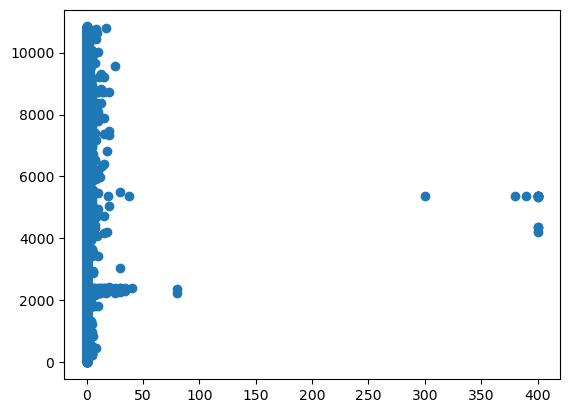

In [237]:
x=df['Price']
y = df.index
plt.scatter(x,y)
plt.show()

##scatter plot to show how the values of Price column are scatter

## U can see that in the below chart there around 5-6 pts which 
## are distant from most of the points i.e outliers 
## their price values are around 300-450 dollars

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [238]:
## Checking the apps with price more than 200
df.loc[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [239]:
## modifing dataset
df=df.loc[df['Price']<200,:]

iii. After dropping the useless records, make the suitable plot again to identify outliers

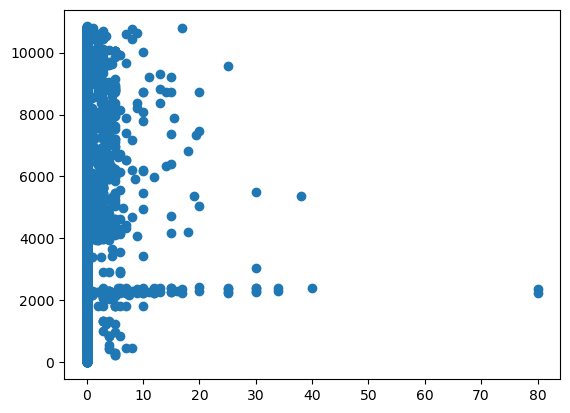

In [240]:
x=df['Price']
y = df.index
plt.scatter(x,y)
plt.show()

iv. Limit data to records with price < $30

In [241]:
df=df.loc[df['Price']<30,:]

b. Reviews column

i. Make suitable plot

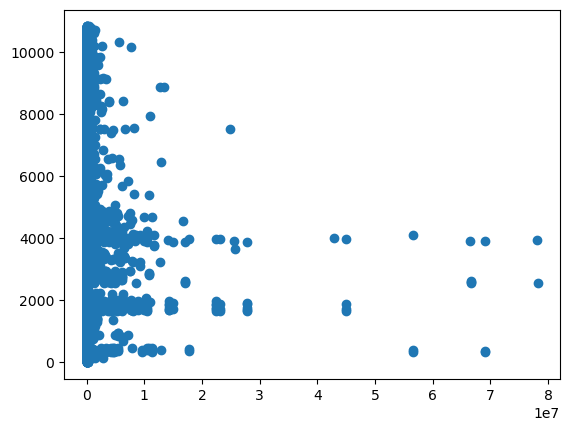

In [243]:
x=df['Reviews']
y = df.index
plt.scatter(x,y)
plt.show()

ii. Limit data to apps with < 1 Million reviews

In [244]:
df=df.loc[df['Reviews']<1000000,:]

c. Installs

i. What is the 95th percentile of the installs?

In [245]:
df['Installs'].quantile(0.95)

10000000.0

In [246]:
df=df.loc[df['Installs']<df['Installs'].quantile(0.95),:]

# Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

a. How do you explain this?

b. What is the implication of this on your analysis?

In [247]:
import seaborn as sns

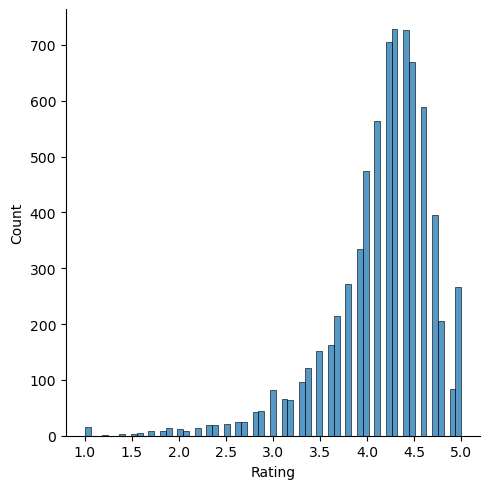

In [249]:
## displot function will give you distribution plot
data = df['Rating']

sns.displot(data)

plt.show()

On seeing the above distribution plot, we can clearly see that the data is more skewed towards the higher values.


Implication:-

The distribution plot tells us that Most of the apps have rating(mode)
is around 4.3. And 50% rating of the apps is around 3.9-4.5 with average near 4.15.

And We can also see that there is a small peak at the beginning of the distribution plot, which indicates that some apps have rating as min value (i.e 1). This might be act as outlier for our data.

6. What are the top Content Rating values?

a. Are there any values with very few records?

b. If yes, drop those as they won’t help in the analysis

In [266]:
df.groupby(by=['Content Rating']).count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3,3
Everyone,5911,5911,5911,5911,5911,5911,5911,5911,5911,5911,5911,5911
Everyone 10+,249,249,249,249,249,249,249,249,249,249,249,249
Mature 17+,346,346,346,346,346,346,346,346,346,346,346,346
Teen,746,746,746,746,746,746,746,746,746,746,746,746
Unrated,1,1,1,1,1,1,1,1,1,1,1,1


In [267]:
##value_counts() function will give u the freq of the occurance of
## each value in that column
df['Content Rating'].value_counts()

Everyone           5911
Teen                746
Mature 17+          346
Everyone 10+        249
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

The Top Content Rating is 'Everyone' with total of 5911 apps.

Yes, There are 2 content Rating with very few records. 
They are 'Adults only 18+'and 'Unrated' with 3 and 1 as no.of apps 
respectively.

In [274]:
##drop the content Ratings with very few records
df=df.loc[df['Content Rating']!='Unrated']
df=df.loc[df['Content Rating']!='Adults only 18+']

In [275]:
## Checking whether they are removed or not
df['Content Rating'].value_counts()

Everyone        5911
Teen             746
Mature 17+       346
Everyone 10+     249
Name: Content Rating, dtype: int64

7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

b. Do you see any patterns?

c. How do you explain the pattern?

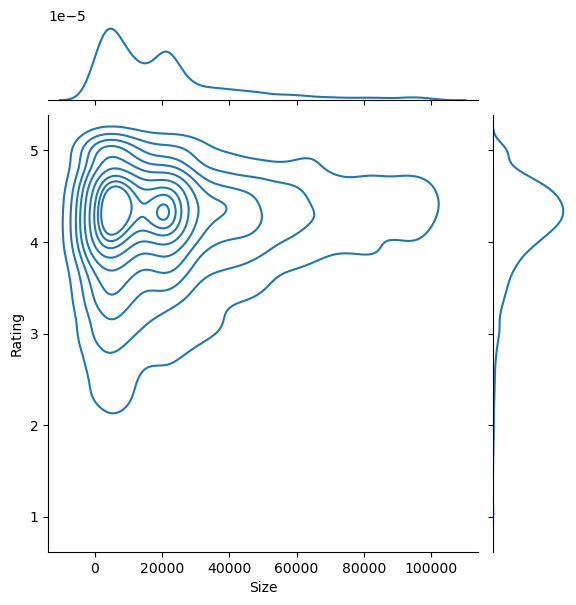

In [289]:
sns.jointplot(x='Size'
              ,y='Rating'
              ,kind='kde'
             ,data=df)

plt.show()

From the above plot, 

Based on Margin plots,We can most of the size of the apps is skewed towards lower values and rating are skewed towards higher values.

On seeing main plot, we see that as the size increases the rating also
increases so there is a +ve correlation between the size and ratings.


8. Effect of price on rating

a. Make a jointplot (with regression line)

b. What pattern do you see?

c. How do you explain the pattern?

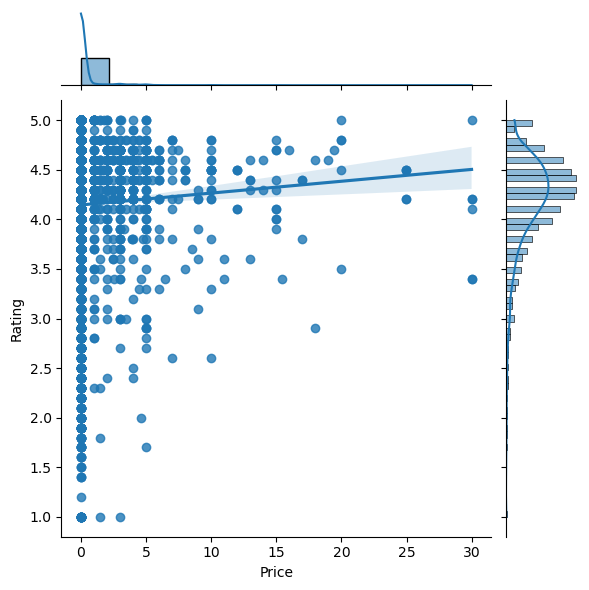

In [296]:
sns.jointplot(x='Price'
             ,y='Rating'
             ,kind='reg'
             ,data=df
             )
plt.show()

Most of the apps are available at the free of cost. And as the price is increasing there is a slight improvement in the ratings. Here  i am sensing a slight positive relation based in regression line(blue line).

d. Replot the data, this time with only records with price > 0

e. Does the pattern change?

f. What is your overall inference on the effect of price on the rating

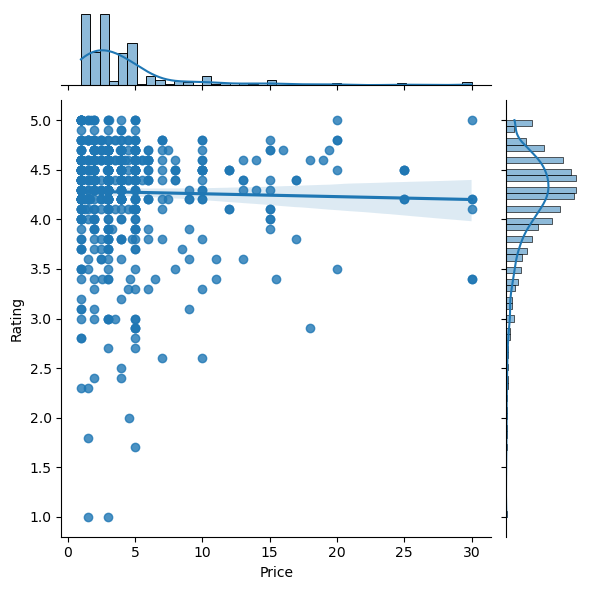

In [299]:
data=df[df['Price']>0]['Price']
sns.jointplot(x=data
             ,y='Rating'
             ,kind='reg'
             ,data=df)
plt.show()

Well, The pattern of regression line changed very lightly and 
it shows some -ve relation towards high price and mostly consistent.

On overall scale, you will get above avg ratings at the higher priced
apps. So we consider that the apps with higher price will perform 
better comparatively.

9. Look at all the numeric interactions together –

a. Make a pairplort with the colulmns

        - 'Reviews', 'Size', 'Rating', 'Price'

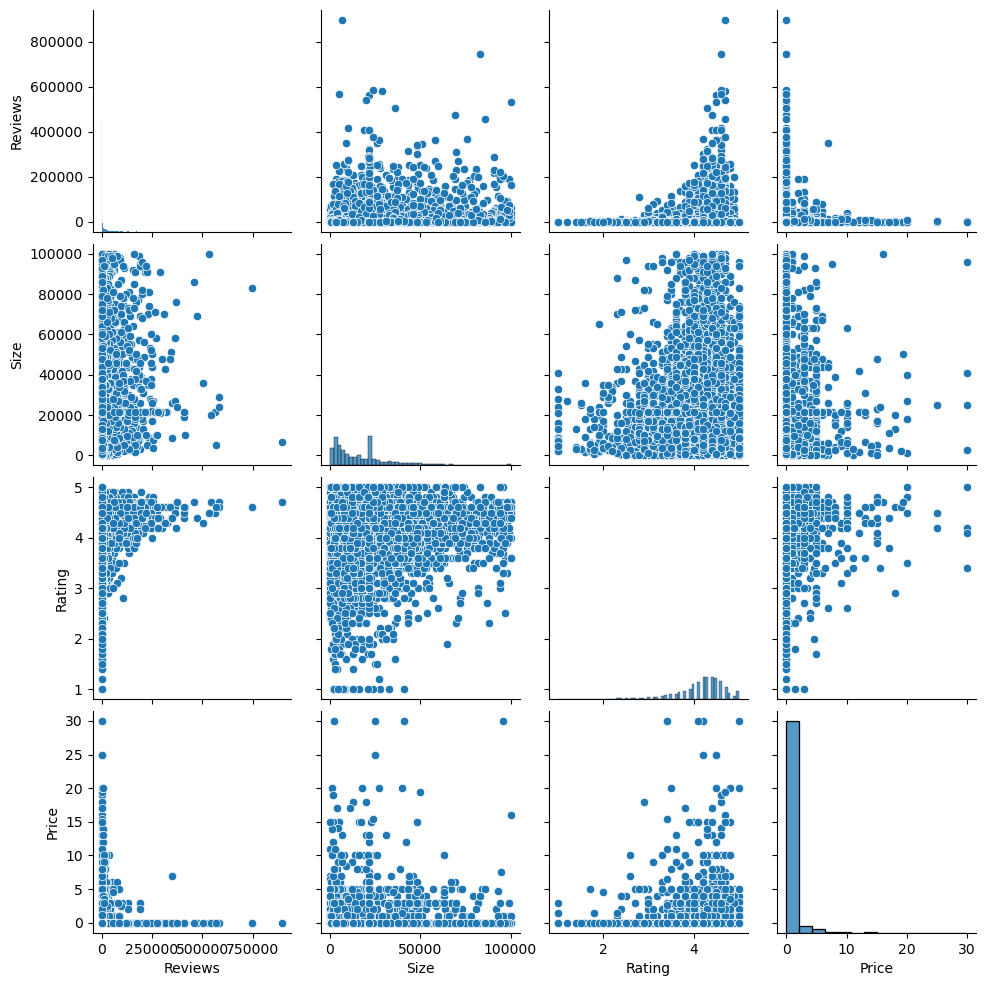

In [304]:
sns.pairplot(data=df[['Reviews', 'Size', 'Rating', 'Price']])

plt.show()

10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

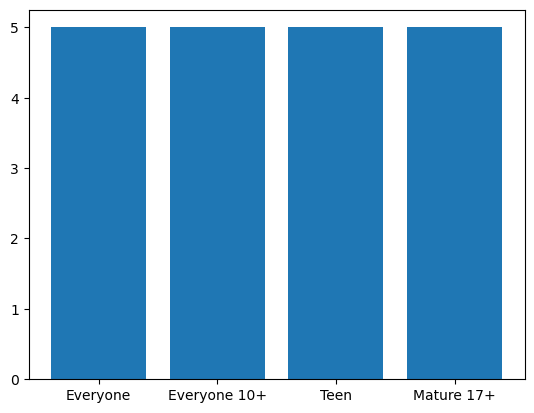

In [305]:
x=df['Content Rating']
y=df['Rating']

plt.bar(x,y)

plt.show()

The above plot haven't shown any useful info.

b. Which metric would you use? Mean? Median? Some other quantile?

c. Choose the right metric and plot

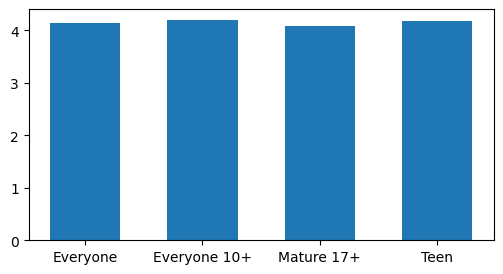

In [343]:
data=df[['Content Rating','Rating']].groupby(['Content Rating']).mean()
x=data.index
y=data['Rating']


plt.figure(figsize =(6,3))
plt.bar(x,y,width=0.6)
plt.show()

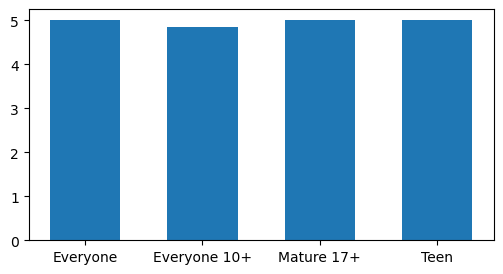

In [344]:
data=df[['Content Rating','Rating']].groupby(['Content Rating']).quantile(0.99)
x=data.index
y=data['Rating']


plt.figure(figsize =(6,3))
plt.bar(x,y,width=0.6)
plt.show()

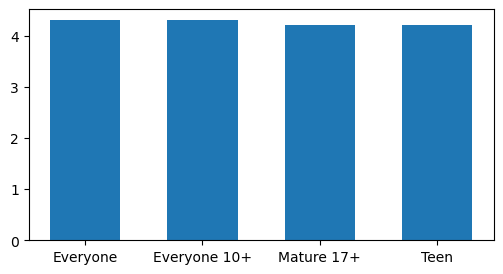

In [342]:
data=df[['Content Rating','Rating']].groupby(['Content Rating']).median()
x=data.index
y=data['Rating']

plt.figure(figsize =(6,3))
plt.bar(x,y,width=0.6)
plt.show()

11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination

c. Make a heatmap of this
i. Annotated
ii. Greens color map

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

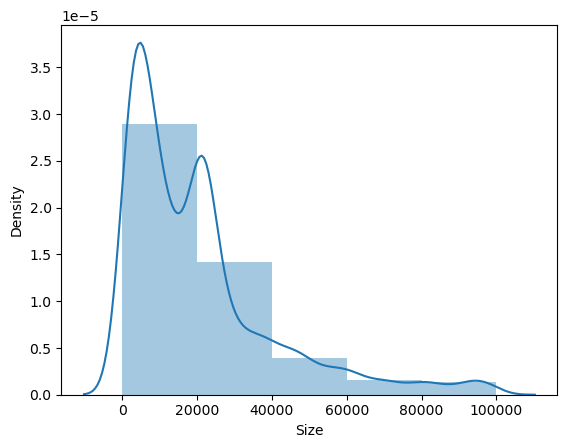

In [346]:
#Checking skewness
sns.distplot(df["Size"], bins=5)
plt.show()

In [354]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LIGHT','LIGHT','MEDIUM','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LIGHT,4.108322,4.188889,3.948485,4.210870
LIGHT,4.149397,4.192593,4.120213,4.208800
MEDIUM,4.165207,4.240625,3.809259,4.109524
HIGH,4.176248,4.198718,4.152273,4.156627
VERY HIGH,4.152523,4.171277,4.192208,4.227848


In [349]:
df.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     4100.000000
0.4     9800.000000
0.6    21516.529524
0.8    31000.000000
Name: Size, dtype: float64

In [350]:
df.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.8
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

In [355]:
Size_Buckets =pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LIGHT,3.8,3.84,3.24,3.82
LIGHT,3.8,3.92,3.60,3.80
MEDIUM,3.8,4.10,3.40,3.90
HIGH,3.9,4.00,3.90,3.90
VERY HIGH,3.8,3.90,4.00,4.00


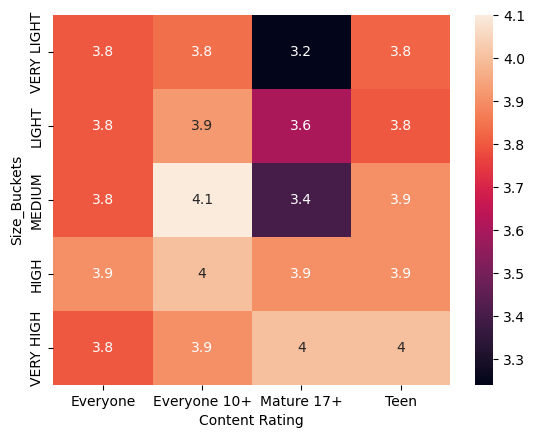

In [356]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

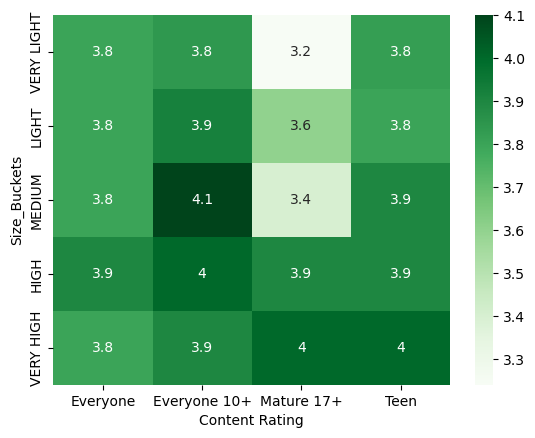

In [357]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()